# Question 1: 
### Have superhero movies released by major distributors earned significantly more worldwide box office revenue than those from smaller distributors?

# Question 2: 
### Has the average worldwide box office revenue of superhero movies increased over the years?

# Question 3: 
### Do movies based on existing IPs (e.g., comics, TV shows) outperform original superhero movies in worldwide box office revenue?

# Question 4: 
### Do movie sequels/reboots and remakes tend to out-perform their original counterparts?

In [1]:
import pandas as pd
import seaborn as sns
import re
import math
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

## Data Cleaning/Wrangling and Exploratory Data Analysis

In [2]:
supers = pd.read_csv('superhero_movies_dataset.csv')
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,NaN,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,NaN,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,RKO Pictures,NaN,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,NaN,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,NaN,Film featuring The Shadow character.
...,...,...,...,...,...,...,...
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate Films (Summit Entertainment),"Theatrical ($32,687,932)",Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate Films,"Theatrical ($21,105,349)",Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount Pictures,"Theatrical ($491,603,986)",Hybrid film with both live-action and animatio...
405,2025,Henry Danger: The Movie,Original,Joe Menendez,Paramount Pictures (Paramount+),NaN,Continuation of the television series Henry Da...


In [3]:
print('Unique Publishers:')
print(supers['Publisher'].unique())
print('\n')
print('Unique Distributors')
print(supers['Distributor'].unique())

Unique Publishers:
['Street & Smith' 'Detroit Mirror' 'WXYT (AM)' 'Original'
 'King Features Syndicate' 'Argosy' 'Weird Tales' 'Vertigo/DC'
 'Hall Syndicate' 'Fiction House' 'Oriental Stories'
 'Warren Murphy, Richard Sapir' 'Mattel' 'Harcourt'
 'Register and Tribune Syndicate' 'Mirage Studios' 'Pacific Comics'
 'Tokuma Shoten, Kadokawa Shoten' 'Nintendo' 'Caliber Comics'
 'Technōs Japan' 'Capcom' 'Midway Games' 'Rebellion Developments'
 'Shueisha' 'Strip' 'Warren Publishing' 'Big Bang Comics' 'TSR, Inc.'
 'Eidos' "America's Best Comics" 'CrossGen' 'Constable & Robinson'
 'Event Comics' 'AC Comics' 'POW! Entertainment' 'Los Cornex' 'Hasbro'
 "Wu Cheng'en" 'A.C. McClurg' 'Holyoke Publishing, NOW Comics'
 'Sergio Bonelli Editore' 'HarperCollins' 'Daewon C.I.' 'Standard Comics'
 'Grand Central Publishing' 'Toho' 'Radical Studios' 'Kevin Grevioux'
 'Jeff Chan' 'Kodansha' 'Valiant Comics' 'Grosset & Dunlap'
 'Sega Sammy Group' 'Candlewick Press'
 'Warner Bros. Interactive Entertainment' 'Fr

In [4]:
print(supers['Distributor'].value_counts())

Distributor
Paramount Pictures                                                        28
Walt Disney Studios Motion Pictures (20th Century Studios)                24
Sony Pictures (Columbia Pictures)                                         21
Universal Pictures                                                        20
Warner Bros. Pictures                                                     15
                                                                          ..
Tubi                                                                       1
Sony Pictures (Stage 6 Films)                                              1
Walt Disney Studios Motion Pictures (Walt Disney Pictures & Lucasfilm)     1
Warner Bros. Pictures (Max)                                                1
Altered Innocence                                                          1
Name: count, Length: 149, dtype: int64


In [5]:
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Disney' if 'Disney' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Paramount' if 'Paramount' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Sony' if 'Sony' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Universal' if 'Universal' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Warner Bros.' if 'Warner Bros.' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'MGM' if 'Amazon' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Lionsgate' if 'Lionsgate' in x else x)
supers['Distributor'] = supers['Distributor'].apply(lambda x: 'Netflix' if 'Netflix' in x else x)

keywords = ['Disney', 'Sony', 'Paramount', 'Lionsgate', 'Universal', 'MGM', 'Netflix', 'Warner Bros.']
pattern = '|'.join(keywords)
supers['Distributor'] = supers['Distributor'].apply(lambda x: x if pd.notnull(x) and re.search(pattern, x, re.IGNORECASE) else 'Other')

print(supers['Distributor'].value_counts())
print('\n')
print('Unique Distributors')
print(supers['Distributor'].unique())

Distributor
Other           105
Disney           61
Paramount        55
Sony             53
Warner Bros.     49
Universal        41
MGM              20
Lionsgate        16
Netflix           7
Name: count, dtype: int64


Unique Distributors
['Other' 'Warner Bros.' 'MGM' 'Paramount' 'Disney' 'Universal' 'Sony'
 'Lionsgate' 'Netflix']


In [6]:
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Other,NaN,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Other,NaN,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,Other,NaN,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Other,NaN,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Other,NaN,Film featuring The Shadow character.
...,...,...,...,...,...,...,...
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,"Theatrical ($32,687,932)",Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,"Theatrical ($21,105,349)",Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,"Theatrical ($491,603,986)",Hybrid film with both live-action and animatio...
405,2025,Henry Danger: The Movie,Original,Joe Menendez,Paramount,NaN,Continuation of the television series Henry Da...


In [7]:
print(supers['Worldwide_Gross'].unique())

[nan 'Theatrical ($1,550,000)' 'Theatrical ($300,000)'
 'Theatrical ($12,000,000)' 'Theatrical ($775.8,000,000)'
 'Theatrical ($15,934,737)' 'Theatrical ($27,107,960)'
 'Theatrical ($549,000,000)' 'Theatrical ($389.9,000,000)'
 'Theatrical ($4,500,000)' 'Theatrical ($160,000,000)'
 'Theatrical ($5.1,000,000)' 'Theatrical ($12,617,845)'
 'Theatrical ($14.1,000,000)' 'Theatrical ($33,001,374)'
 'Theatrical ($79.1,000,000)' 'Theatrical ($2.5,000,000)'
 'Theatrical ($11,000,000)' 'Theatrical ($475.1,000,000)'
 'Theatrical ($800,000)' 'Theatrical ($333.1,000,000)'
 'Theatrical ($6,254,148)' 'Theatrical ($4,000,000)'
 'Theatrical ($56.3,000,000)' 'Theatrical ($295.2,00,000)' '($31,000,000)'
 'Theatrical ($5,778,353)' 'Theatrical' 'Theatrical ($6.9,000,000)'
 'Theatrical ($14.4,000,000)' 'Theatrical ($3,500,000)'
 'Theatrical ($4,601,256)' 'Theatrical ($23.7,000,000)'
 'Theatrical ($53,424,681)' 'Theatrical ($84,000)'
 'Theatrical ($17,000,000)' 'Theatrical ($30.9,000,000)'
 'Theatrical ($67,

In [8]:
pattern_gross = pattern = r'^Theatrical \(\$\d+(,\d{3})*(\.\d{2})?\)$'
supers = supers[supers['Worldwide_Gross'].str.match(pattern_gross, na=False)]

In [9]:
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,"Theatrical ($1,550,000)",Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,Other,"Theatrical ($300,000)",NaN
19,1975,Dolemite,Original,D'Urville Martin,Other,"Theatrical ($12,000,000)",NaN
25,1980,Hero at Large,Original,Martin Davidson,MGM,"Theatrical ($15,934,737)",NaN
26,1980,Flash Gordon,King Features Syndicate,Mike Hodges,Universal,"Theatrical ($27,107,960)",Based on the comic strip by Alex Raymond
...,...,...,...,...,...,...,...
400,2024,Godzilla x Kong: The New Empire,Toho,Adam Wingard,Warner Bros.,"Theatrical ($571,750,016)",Produced by Legendary Pictures Sequel to Godzi...
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,"Theatrical ($32,687,932)",Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,"Theatrical ($21,105,349)",Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,"Theatrical ($491,603,986)",Hybrid film with both live-action and animatio...


In [10]:
supers['Worldwide_Gross'] = supers['Worldwide_Gross'].astype(str)
supers['Worldwide_Gross'] = supers['Worldwide_Gross'].str.extract(r'Theatrical \(\$(.*?)\)')[0]
supers['Worldwide_Gross'] = supers['Worldwide_Gross'].str.replace(r'\.', '', regex=True)
supers['Worldwide_Gross'] = supers['Worldwide_Gross'].str.replace(',', '', regex=False)
supers['Worldwide_Gross'] = pd.to_numeric(supers['Worldwide_Gross'], errors='coerce')
supers

C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\2265240865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supers['Worldwide_Gross'] = supers['Worldwide_Gross'].astype(str)
C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\2265240865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supers['Worldwide_Gross'] = supers['Worldwide_Gross'].str.extract(r'Theatrical \(\$(.*?)\)')[0]
C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\2265240865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000,Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,Other,300000,NaN
19,1975,Dolemite,Original,D'Urville Martin,Other,12000000,NaN
25,1980,Hero at Large,Original,Martin Davidson,MGM,15934737,NaN
26,1980,Flash Gordon,King Features Syndicate,Mike Hodges,Universal,27107960,Based on the comic strip by Alex Raymond
...,...,...,...,...,...,...,...
400,2024,Godzilla x Kong: The New Empire,Toho,Adam Wingard,Warner Bros.,571750016,Produced by Legendary Pictures Sequel to Godzi...
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,32687932,Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,21105349,Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,491603986,Hybrid film with both live-action and animatio...


In [11]:
supers = supers.rename({'Worldwide_Gross': 'Worldwide_Gross ($)'}, axis=1)
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross ($),Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000,Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,Other,300000,NaN
19,1975,Dolemite,Original,D'Urville Martin,Other,12000000,NaN
25,1980,Hero at Large,Original,Martin Davidson,MGM,15934737,NaN
26,1980,Flash Gordon,King Features Syndicate,Mike Hodges,Universal,27107960,Based on the comic strip by Alex Raymond
...,...,...,...,...,...,...,...
400,2024,Godzilla x Kong: The New Empire,Toho,Adam Wingard,Warner Bros.,571750016,Produced by Legendary Pictures Sequel to Godzi...
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,32687932,Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,21105349,Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,491603986,Hybrid film with both live-action and animatio...


# Question 1: 
### Have superhero movies released by major distributors earned significantly more worldwide box office revenue than those from smaller distributors?


In [12]:
supers['Distributor_Type'] = supers['Distributor'].apply(lambda x: 'Major' if x in keywords else 'Other')
supers.groupby('Distributor_Type')['Worldwide_Gross ($)'].mean()

Distributor_Type
Major    1.232474e+08
Other    1.169967e+07
Name: Worldwide_Gross ($), dtype: float64

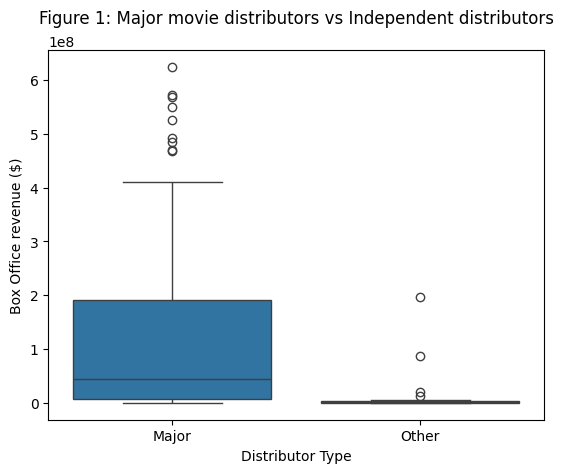

<Figure size 640x480 with 0 Axes>

In [13]:
sns.boxplot(data=supers, x='Distributor_Type', y='Worldwide_Gross ($)')
plt.title('Figure 1: Major movie distributors vs Independent distributors', y=1.05)
plt.xlabel('Distributor Type')
plt.ylabel('Box Office revenue ($)')
plt.show()
plt.clf()

In [14]:
major = supers[supers['Distributor_Type'] == 'Major']['Worldwide_Gross ($)']
other = supers[supers['Distributor_Type'] == 'Other']['Worldwide_Gross ($)']
t_stat_h1, p_val_h1 = ttest_ind(major, other, nan_policy='omit')
print(f'P-value between Global Box Office Revenue for Major Distributors and Other distributors: {p_val_h1:.3g}')

P-value between Global Box Office Revenue for Major Distributors and Other distributors: 0.000317


# Question 2: 
### Has the average worldwide box office revenue of superhero movies increased over the years?

In [15]:
supers['Decade'] = (supers['Year']//10)*10
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross ($),Description,Distributor_Type,Decade
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000,Film based on The Lone Ranger television series.,Major,1950
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,Other,300000,NaN,Other,1970
19,1975,Dolemite,Original,D'Urville Martin,Other,12000000,NaN,Other,1970
25,1980,Hero at Large,Original,Martin Davidson,MGM,15934737,NaN,Major,1980
26,1980,Flash Gordon,King Features Syndicate,Mike Hodges,Universal,27107960,Based on the comic strip by Alex Raymond,Major,1980
...,...,...,...,...,...,...,...,...,...
400,2024,Godzilla x Kong: The New Empire,Toho,Adam Wingard,Warner Bros.,571750016,Produced by Legendary Pictures Sequel to Godzi...,Major,2020
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,32687932,Based on a video game of the same name,Major,2020
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,21105349,Reboot of the same name Co-produced with Media...,Major,2020
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,491603986,Hybrid film with both live-action and animatio...,Major,2020


In [16]:
decade_avg = supers.groupby('Decade')['Worldwide_Gross ($)'].mean().reset_index()
decade_avg

,Decade,Worldwide_Gross ($)
0,1950,1.550000e+06
1,1970,6.150000e+06
2,1980,4.651314e+07
3,1990,5.304056e+07
4,2000,7.997718e+07
5,2010,1.578900e+08
6,2020,1.740374e+08


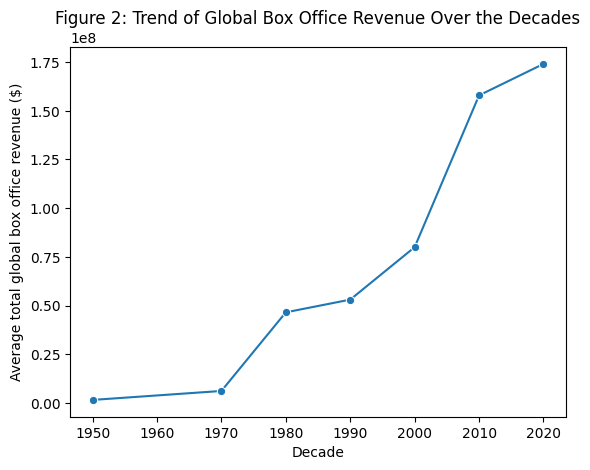

<Figure size 640x480 with 0 Axes>

In [17]:
decades = sns.lineplot(data=decade_avg, x='Decade', y='Worldwide_Gross ($)', marker='o')
decades.set(title='Figure 2: Trend of Global Box Office Revenue Over the Decades', xlabel='Decade', ylabel='Average total global box office revenue ($)')
plt.show()
plt.clf()

In [18]:
years_avg = supers.groupby('Year')['Worldwide_Gross ($)'].mean().reset_index()
years_avg

,Year,Worldwide_Gross ($)
0,1956,1.550000e+06
1,1970,3.000000e+05
2,1975,1.200000e+07
3,1980,1.973476e+08
4,1981,5.903928e+07
5,1982,3.300137e+07
6,1983,1.100000e+07
7,1984,4.208125e+06
8,1986,4.050628e+06
9,1987,2.350289e+07


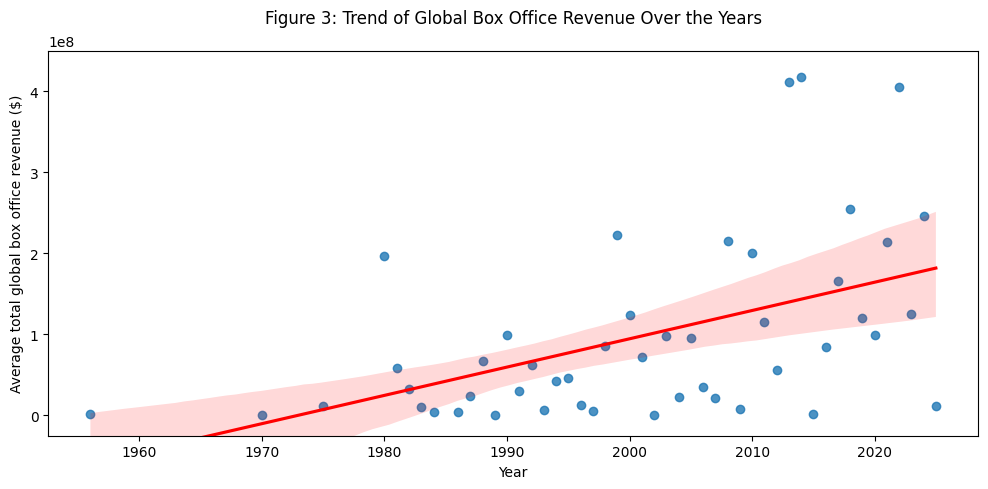

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12,5))
sns.regplot(data=years_avg, x='Year', y='Worldwide_Gross ($)', marker='o', line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylim(-0.25e8, 4.5e8)
plt.ylabel('Average total global box office revenue ($)')
plt.title('Figure 3: Trend of Global Box Office Revenue Over the Years', y=1.05)
plt.show()
plt.clf()

# Question 3: 
### Do movies based on existing IPs (e.g., comics, TV shows) outperform original superhero movies in worldwide box office revenue?

In [20]:
supers['IP Type'] = supers['Publisher'].apply(lambda x: 'Original' if x == 'Original' else 'Based on IP')
supers

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross ($),Description,Distributor_Type,Decade,IP Type
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000,Film based on The Lone Ranger television series.,Major,1950,Based on IP
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,Other,300000,NaN,Other,1970,Original
19,1975,Dolemite,Original,D'Urville Martin,Other,12000000,NaN,Other,1970,Original
25,1980,Hero at Large,Original,Martin Davidson,MGM,15934737,NaN,Major,1980,Original
26,1980,Flash Gordon,King Features Syndicate,Mike Hodges,Universal,27107960,Based on the comic strip by Alex Raymond,Major,1980,Based on IP
...,...,...,...,...,...,...,...,...,...,...
400,2024,Godzilla x Kong: The New Empire,Toho,Adam Wingard,Warner Bros.,571750016,Produced by Legendary Pictures Sequel to Godzi...,Major,2020,Based on IP
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate,32687932,Based on a video game of the same name,Major,2020,Based on IP
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate,21105349,Reboot of the same name Co-produced with Media...,Major,2020,Based on IP
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount,491603986,Hybrid film with both live-action and animatio...,Major,2020,Based on IP


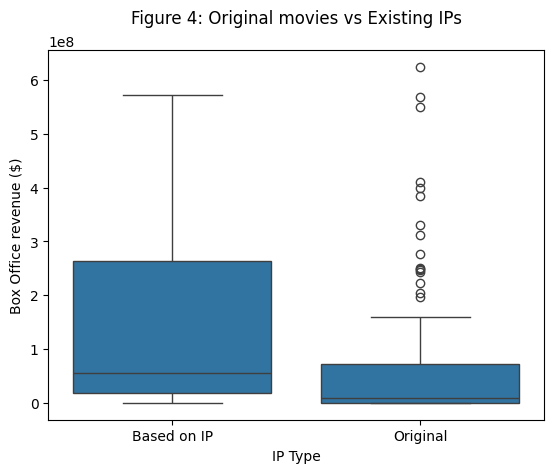

<Figure size 640x480 with 0 Axes>

In [21]:
sns.boxplot(data=supers, x='IP Type', y='Worldwide_Gross ($)')
plt.title('Figure 4: Original movies vs Existing IPs', y=1.05)
plt.xlabel('IP Type')
plt.ylabel('Box Office revenue ($)')
plt.show()
plt.clf()

In [22]:
original = supers[supers['IP Type'] == 'Original']['Worldwide_Gross ($)']
based_on_ip = supers[supers['IP Type'] == 'Based on IP']['Worldwide_Gross ($)']
t_stat_h3, p_val_h3 = ttest_ind(original, based_on_ip, nan_policy='omit')
print(f'P-value between Global Box Office Revenue for Original Movies and Movies based on existing IPs: {p_val_h3:.3g}')

P-value between Global Box Office Revenue for Original Movies and Movies based on existing IPs: 0.00317


# Question 4: 
### Do movie sequels/reboots and remakes tend to out-perform their original counterparts?

In [23]:
print(supers['Film'].unique())

['The Lone Ranger' 'Hercules in New York' 'Dolemite' 'Hero at Large'
 'Flash Gordon' 'The Empire Strikes Back' 'Condorman' 'The Cannonball Run'
 'The Legend of the Lone Ranger' 'Tron' 'Hercules' 'The Toxic Avenger'
 'The Adventures of Buckaroo Banzai Across the 8th Dimension'
 'The Brother from Another Planet' 'Sheena' 'The Wraith' 'Eliminators'
 'RoboCop' 'Wild Thing' 'Masters of the Universe' 'Moonwalker'
 'The Toxic Avenger Part II'
 'The Toxic Avenger Part III: The Last Temptation of Toxie' 'Robot Ninja'
 'Teenage Mutant Ninja Turtles' 'RoboCop 2' 'Darkman'
 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze' 'The Rocketeer'
 'Suburban Commando' 'Beastmaster 2: Through the Portal of Time'
 'The Guyver' '3 Ninjas' 'Universal Soldier' 'The Meteor Man' 'RoboCop 3'
 '3 Ninjas Knuckle Up' 'The Crow' 'Shrunken Heads' "The Shadow'"
 'Blankman' '3 Ninjas Kick Back' 'Darkman II: The Return of Durant'
 'Judge Dredd' 'Mighty Morphin Power Rangers: The Movie'
 'The Demolitionist' 'The Ph

In [24]:
franchises = {
    "The Lone Ranger": ["The Lone Ranger", "The Legend of the Lone Ranger"],
    "The Toxic Avenger": ["The Toxic Avenger", "The Toxic Avenger Part II", "The Toxic Avenger Part III: The Last Temptation of Toxie"],
    "RoboCop": ["RoboCop", "RoboCop 2", "RoboCop 3"],
    "Teenage Mutant Ninja Turtles": [
        "Teenage Mutant Ninja Turtles",
        "Teenage Mutant Ninja Turtles II: The Secret of the Ooze",
        "Teenage Mutant Ninja Turtles: Out of the Shadows"
    ],
    "Darkman": ["Darkman", "Darkman II: The Return of Durant"],
    "The Crow": ["The Crow", "The Crow: City of Angels"],
    "3 Ninjas": [
        "3 Ninjas",
        "3 Ninjas Knuckle Up",
        "3 Ninjas Kick Back",
        "3 Ninjas: High Noon at Mega Mountain"
    ],
    "Power Rangers": [
        "Mighty Morphin Power Rangers: The Movie",
        "Turbo: A Power Rangers Movie",
        "Power Rangers"
    ],
    "Zorro": ["The Mask of Zorro", "The Legend of Zorro"],
    "Universal Soldier": ["Universal Soldier", "Universal Soldier: Regeneration"],
    "Tron": ["Tron", "Tron: Legacy"],
    "Godzilla/Kong": [
        "Godzilla",
        "Kong: Skull Island",
        "Godzilla: King of the Monsters",
        "Godzilla vs. Kong",
        "Godzilla x Kong: The New Empire"
    ],
    "Lazer Team": ["Lazer Team", "Lazer Team 2"],
    "Unbreakable Trilogy": ["Unbreakable", "Split", "Glass"],
    "Sonic the Hedgehog": ["Sonic the Hedgehog", "Sonic the Hedgehog 2", "Sonic the Hedgehog 3"],
    "Transformers": ["Bumblebee", "Transformers: Rise of the Beasts"],
}
title_to_franchise = {title: franchise for franchise, titles in franchises.items() for title in titles}
franchise_df = supers[supers['Film'].isin(title_to_franchise.keys())].copy()
franchise_df['Franchise'] = franchise_df['Film'].map(title_to_franchise)
franchise_df

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross ($),Description,Distributor_Type,Decade,IP Type,Franchise
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000,Film based on The Lone Ranger television series.,Major,1950,Based on IP,The Lone Ranger
33,1981,The Legend of the Lone Ranger,WXYT (AM),William A. Fraker,Universal,12617845,Film based on the Lone Ranger radio show.,Major,1980,Based on IP,The Lone Ranger
35,1982,Tron,Original,Steven Lisberger,Disney,33001374,NaN,Major,1980,Original,Tron
41,1984,The Toxic Avenger,Original,Lloyd Kaufman,Other,800000,NaN,Other,1980,Original,The Toxic Avenger
57,1987,RoboCop,Original,Paul Verhoeven,MGM,53424681,NaN,Major,1980,Original,RoboCop
66,1989,The Toxic Avenger Part II,Original,Lloyd Kaufman,Other,792966,Sequel to 1984's The Toxic Avenger,Other,1980,Original,The Toxic Avenger
67,1989,The Toxic Avenger Part III: The Last Temptatio...,Original,Lloyd Kaufman,Other,363561,Sequel to 1989's The Toxic Avenger Part II,Other,1980,Original,The Toxic Avenger
72,1990,Teenage Mutant Ninja Turtles,Mirage Studios,Steve Barron,Warner Bros.,201965915,NaN,Major,1990,Based on IP,Teenage Mutant Ninja Turtles
73,1990,RoboCop 2,Original,Irvin Kershner,MGM,45681173,Sequel to a 1987 film,Major,1990,Original,RoboCop
74,1990,Darkman,Original,Sam Raimi,Universal,48878502,NaN,Major,1990,Original,Darkman


C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\4113026006.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Film'] + '\n(' + data['Year'].astype(str) + ')'
C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\4113026006.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Film'] + '\n(' + data['Year'].astype(str) + ')'
C:\Users\sammy\AppData\Local\Temp\ipykernel_21608\4113026006.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

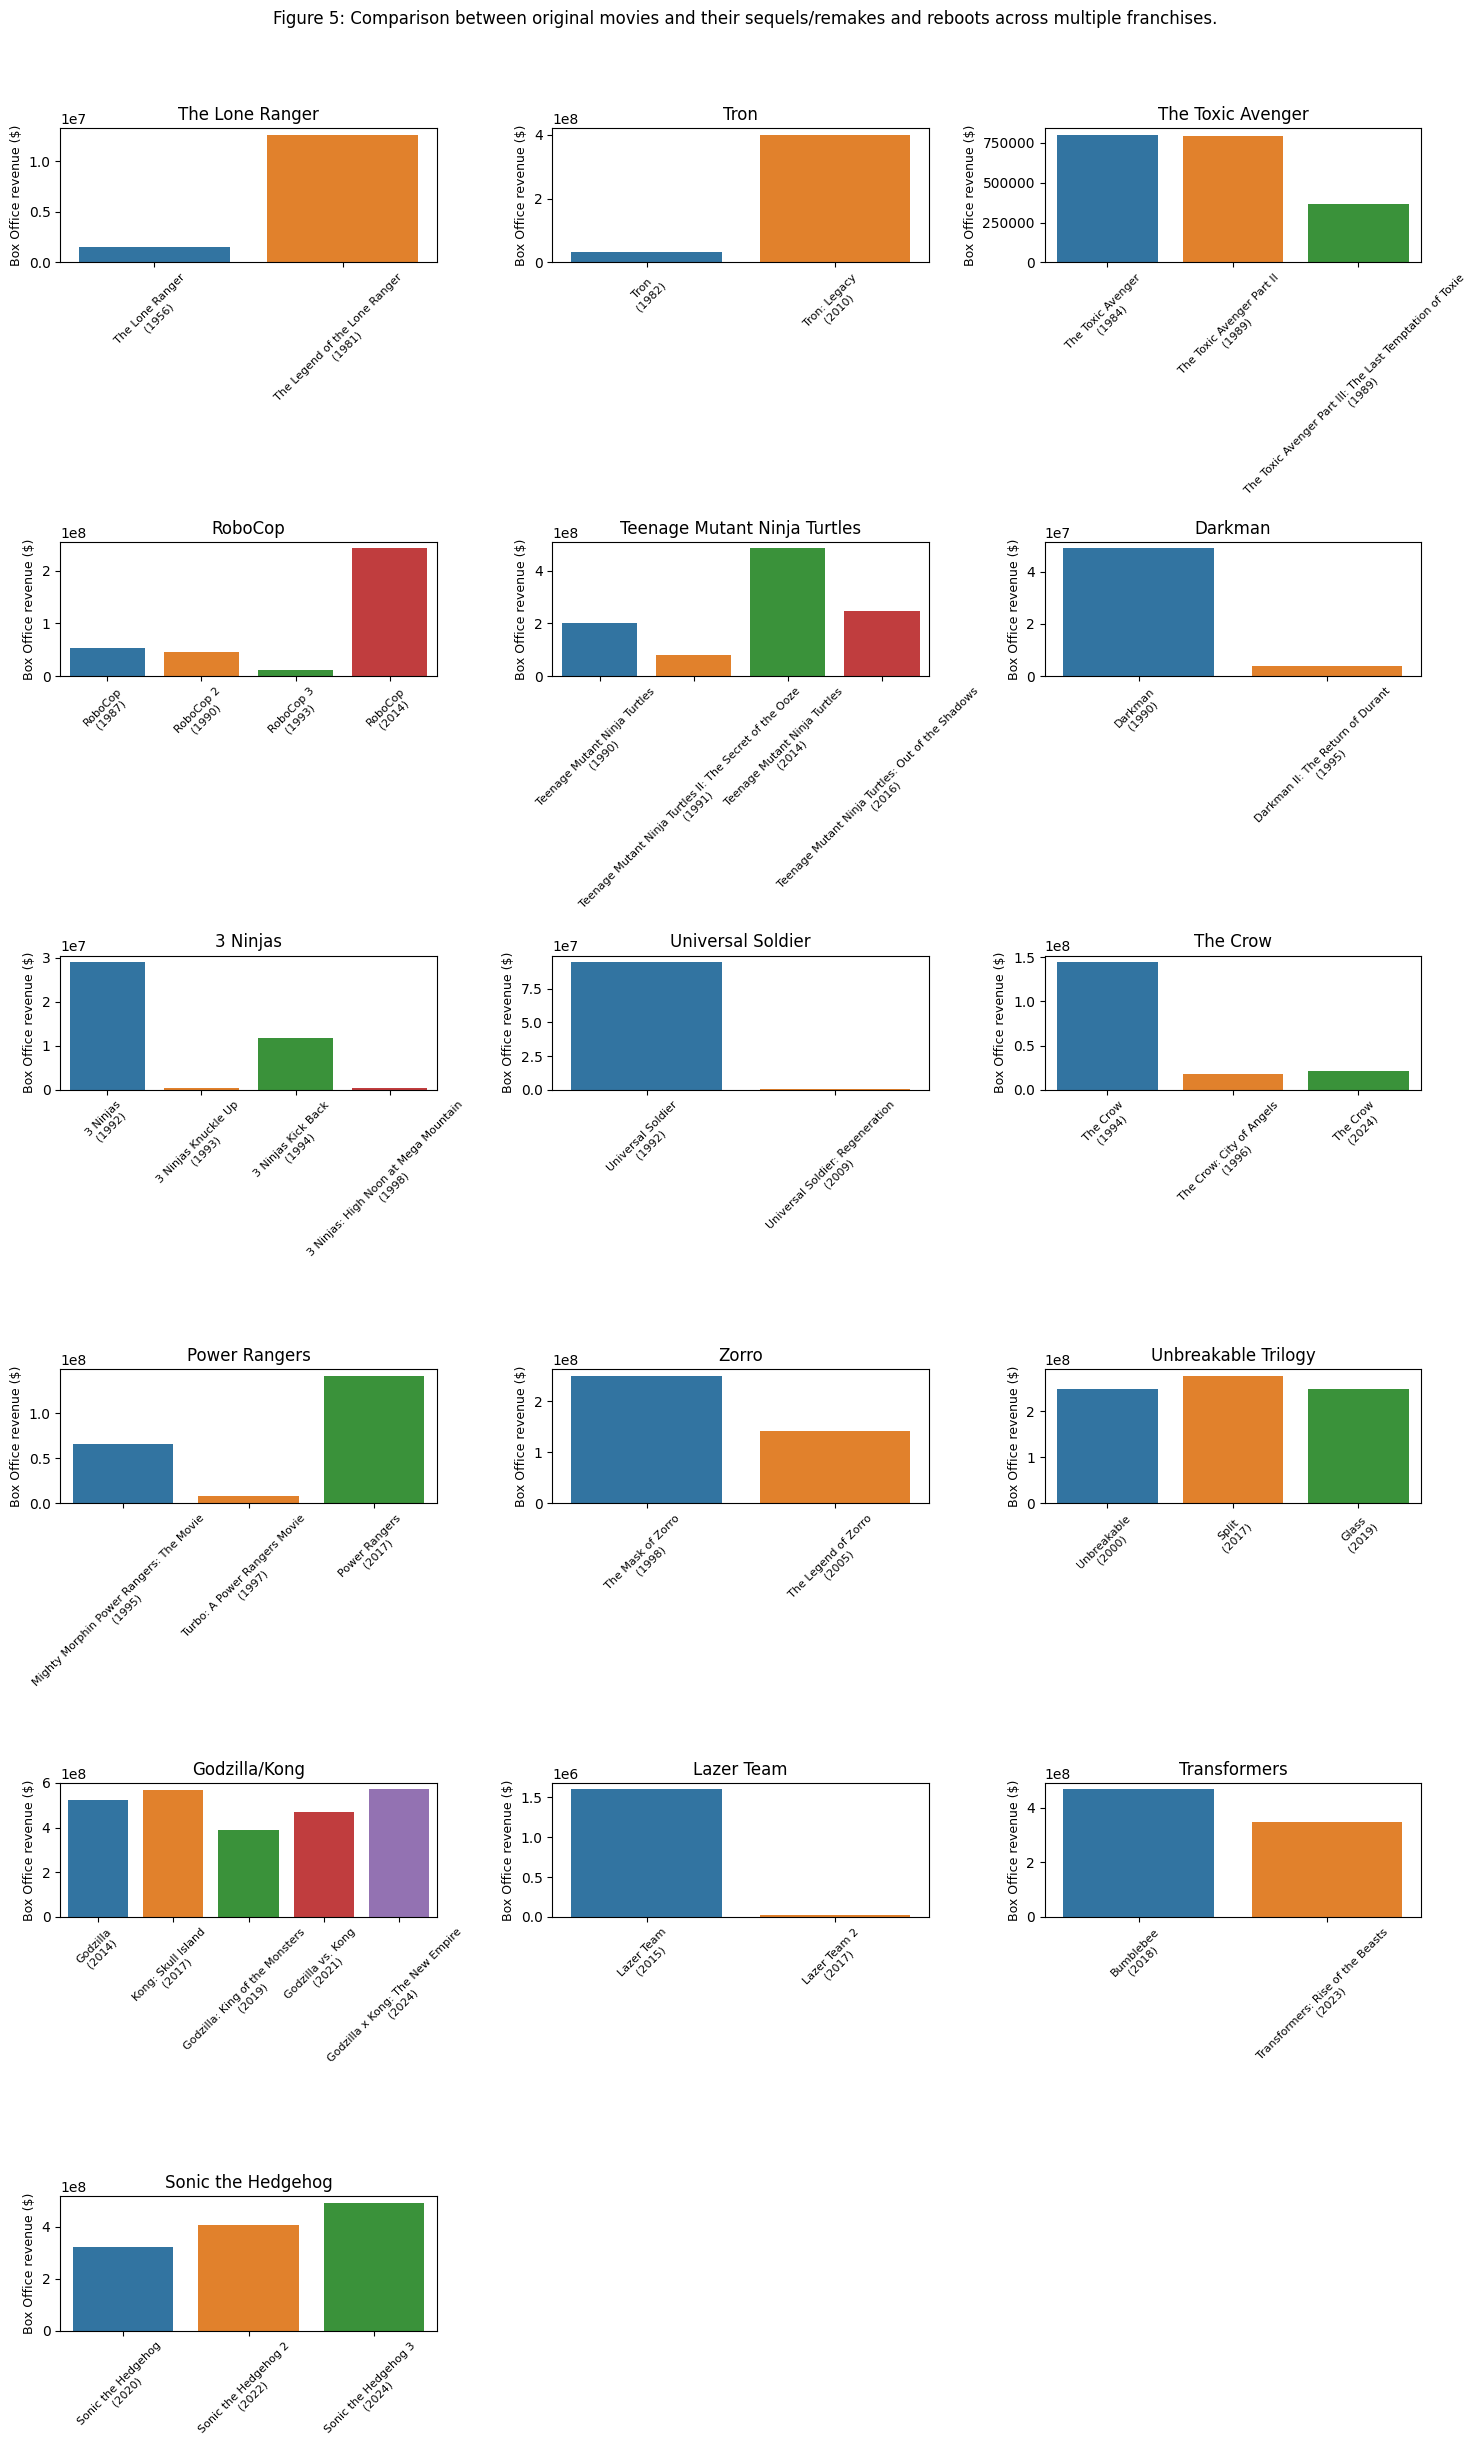

In [25]:
unique_franchises = franchise_df['Franchise'].unique()
num_franchises = len(unique_franchises)

cols = 3
rows = math.ceil(num_franchises / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, franchise in enumerate(unique_franchises, 1):
    data = franchise_df[franchise_df['Franchise'] == franchise]
    
    plt.subplot(rows, cols, i)
    plt.suptitle('Figure 5: Comparison between original movies and their sequels/remakes and reboots across multiple franchises.', y=1.02)
    data['Label'] = data['Film'] + '\n(' + data['Year'].astype(str) + ')'
    sns.barplot(data=data, x='Label', y='Worldwide_Gross ($)', hue='Label', legend=False)
    plt.title(franchise)
    plt.xticks(rotation=45, ha='center', fontsize=8)
    plt.xlabel('')
    plt.ylabel('Box Office revenue ($)', fontsize=9)

plt.tight_layout()
plt.show()


In [26]:
print('Conclusion:')
print('\n')
print('\033[1m\033[4mQuestion 1: Have superhero movies released by major distributors earned significantly more box office revenue than those from smaller distributors?\033[0m')
print('Looking at Figure 1, is it clear to see that the box office revenue of superhero movies produced by major distributors is vastly greater than that of independent distributors. This is backed up by the very small p-value from the t-test between the two of 0.000317, which is strong evidence to point towards that this difference is significant. These observations are to be expected in theory, as major distributors have significantly more marketing and distribution power for their movies, and so can encourage more people to go and watch it in theatres. They are also very much more likely to own the IP of existing franchises that fans like, and so those fans will more often than not go and watch a movie they are fimiliar with, rather than a completely original IP they have never encountered before.')
print('\n')
print('\033[1m\033[4mQuestion 2: Has the average worldwide box office revenue of superhero movies increased over the years?\033[0m')
print('The conclusion as to whether average revenue generated for superhero movies has increased over time or not is different depending on how frequent the time intervals are. For example, in Figure 2, it can be clearly seen that there is a steady increase in average box office revenue across each decade. However, in Figure 3, when plotting the average revenue per year for every year that shows up in the dataset, the correlation, whilst also positive, is much weaker and less noticeable than that of Figure 2. There appears to be great inconsistency and increased variation in revenue as the individual years go on.')
print('\n')
print('\033[1m\033[4mQuestion 3: Do movies based on existing IPs (e.g., comics, TV shows) outperform original superhero movies in worldwide box office revenue?\033[0m')
print('Like with the box office revenue between distributors for Hypothesis 1 shown in Figure 1, Figure 4 gives strong and clear evidence that superhero movies based on existing IPs significantly out-perform totally original movie, with the p-value of 0.000317 again from the t-test also solidifying this argument. The reasoning behind this is likely similar as to what was stated for Hypothesis 1; that fans and consumers prefer to watch films based on franchises they have already heard of rather than taking a risk with a completely new story.')
print('\n')
print('\033[1m\033[4mQuestion 4: "Do movie sequels/reboots and remakes tend to out-perform their original counterparts, and do movie franchises tend to out-perform standalone films?\033[0m')
print('Figure 5 shows mixed results in terms of box office revenue. For example, some franchises, such as The Lone Ranger, Tron, and Sonic the Hedgehog, show that their more recently released sequel counterparts significantly outperform the originals at the box office. However, most other franchises (e.g. The Toxic Avenger, The Crow, Universal Soldier, etc.) show a significant decrease in revenue over time as their seuqels/remakes/reboots were released. Some franchises show varied or no change in box office as well. For example, for the Teenage Mutant Ninja Turtles franchise, the latter two movies released in 2014 and 2016 respectively outperformed their 90s originals, however with the same pattern as the second of each two set of movies performing worse than the one that came before it. Other franchises, such as M Night Shyamalan\'s \'Unbreakable\' trilogy, and the Godzilla x Kong franchise, show that all movies within performed similar at the box office and have no clear pattern in variation between movies respectively.')
print('\n')
print('\n')
print('Overall Conclusion:')
print('\n')
print("The analysis reveals that superhero movies backed by major distributors and based on existing intellectual properties consistently achieve higher global box office revenue. While revenue has generally increased over time, the trend is most evident when viewed across broader time intervals, such as decades. Sequel and reboot performance varies by franchise, with some outperforming originals and others underperforming, highlighting the complexity of audience reception and brand fatigue. Overall, established franchises and studio power remain strong predictors of financial success in the superhero genre. It is also worth noting that box office revenue is not the sole factor when determining whether the audience reception of a movie was overall positive or not. Statistics such as individual ratings and/or reviews can allow fans to more specifically express their opinion on certain movies, regardless of the revenue it brought in.")


Conclusion:


Question 1: Have superhero movies released by major distributors earned significantly more box office revenue than those from smaller distributors?
Looking at Figure 1, is it clear to see that the box office revenue of superhero movies produced by major distributors is vastly greater than that of independent distributors. This is backed up by the very small p-value from the t-test between the two of 0.000317, which is strong evidence to point towards that this difference is significant. These observations are to be expected in theory, as major distributors have significantly more marketing and distribution power for their movies, and so can encourage more people to go and watch it in theatres. They are also very much more likely to own the IP of existing franchises that fans like, and so those fans will more often than not go and watch a movie they are fimiliar with, rather than a completely original IP they have never encountered before.


Question 2: Has the average wor